# Project Description: Twitter US Airline Sentiment
## Data Description:
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

## Dataset:
The project is from a dataset from Kaggle.
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment The dataset has to be downloaded from the above Kaggle website.
The dataset has the following columns:
<blockquote>
    <ul>
        <li>tweet_id</li>
        <li>airline_sentiment</li>
        <li>airline_sentiment_confidence</li>
        <li>negativereason</li>
        <li>negativereason_confidence</li>
        <li>airline</li>
        <li>airline_sentiment_gold</li>
        <li>name</li>
        <li>negativereason_gold</li>
        <li>retweet_count</li>
        <li>text</li>
        <li>tweet_coord</li>
        <li>tweet_created</li>
        <li>tweet_location</li>
        <li>user_timezone</li>
    </ul>
</blockquote>

## Objective:
To implement the techniques learnt as a part of the course.


# Step 1: Import the libraries, load dataset, print shape of data, data description

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
import unidecode, unicodedata
import seaborn as sns

import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import contractions
from bs4 import BeautifulSoup  # HTML parser
from nltk.stem import WordNetLemmatizer # Word Lemmatization
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords # Stopwords

# Feature extractions
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Model Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix

nltk.download('stopwords')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sivanandhamp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sivanandhamp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# Load dataset and display first 5 records
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [12]:
# Shape of dataset
print("Dataset shape:",df.shape)

Dataset shape: (14640, 15)


In [13]:
# Dataset description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [14]:
# Dataset column types
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

# Step 2: Understanding data-columns

Text(0, 0.5, 'No. of Tweets')

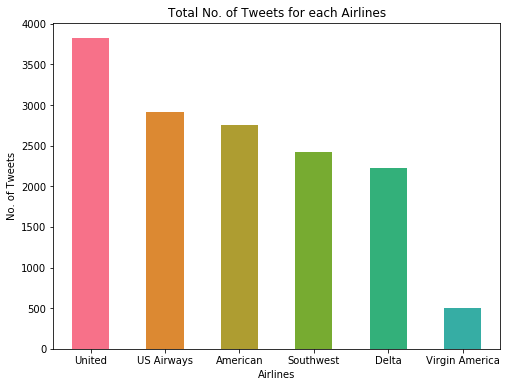

In [15]:
#Plotting the number of tweets each airlines has received
colors=sns.color_palette("husl", 10) 
pd.Series(df["airline"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [7]:
# Remove unwanted columns
df = df[['text','airline_sentiment']]
df.shape

(14640, 2)

In [8]:
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [16]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

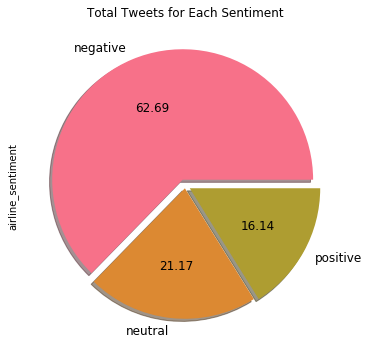

In [10]:
colors=sns.color_palette("husl", 10)
pd.Series(df["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "neutral", "positive"],explode=[0.05,0.02,0.04],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

In [11]:
i=220
print(df['airline_sentiment'][i], df['text'][i])
# print(clean_up(df['text'][i]))

negative @VirginAmerica had to change to another airline to get to DC today ... Why is @united able to land in DC but not you? Cost me $800 ...ugh


In [12]:
df.isnull().sum() # There is no null values

text                 0
airline_sentiment    0
dtype: int64

# Step 3: Pre-processing

In [17]:
# Declare RegExp
PUNCT = string.punctuation
RE_HTTP_URL = re.compile(r"http\S+", re.UNICODE)
RE_NEWLINE_SPLIT = re.compile(r"\s{2,}|\n", re.UNICODE)
RE_PARANTHESES = re.compile(r"\([^)]*\)", re.UNICODE)
RE_REPETITIVE = re.compile(r"(\S)\1{3,}", re.UNICODE)
RE_EMAIL = re.compile(r"\S+@\S+(?:\.\S+)+", re.UNICODE)
RE_PHONE = re.compile(r"\d{3,}(?:-\d{3,})+", re.UNICODE)
RE_WHITESPACE = re.compile(r"\s+", re.UNICODE)
RE_NON_WHITESPACE = re.compile(r"\S+", re.UNICODE)
RE_SINGLE_CURLY_QUOTE = re.compile(r"[\u2018\u2019]", re.UNICODE)
RE_DOUBLE_CURLY_QUOTE = re.compile(r"[\u201D\u201C]", re.UNICODE)

PUNCT = string.punctuation
PUNCT_TABLE = str.maketrans({k: ' ' for k in PUNCT})

# Remove non-stopwords
non_stopwords = ['not','down']
stopwords = list(set(stopwords)- set(non_stopwords))

lemmatizer = WordNetLemmatizer()

# Remove HTML tags
def remove_HTML_tags(text):
    beautiful_soup = BeautifulSoup(text, "html.parser")
    return beautiful_soup.get_text()

# Remove URLs in the text
def remove_URL(text):
    return RE_HTTP_URL.sub("", text)

# Remove Twitter tagging @
def remove_tagging(text):
    return " ".join(filter(lambda x:x[0]!='@', text.split()))

# Handle contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# To lower case
def to_lower(text):
    return text.lower()

# Remove the numbers
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

# Remove Email and Phone
def remove_patterns(text):
    # Email 
    text = RE_EMAIL.sub("", text)
    
    #PHONE
    text = RE_PHONE.sub("", text)
    return text
    
# Remove Parantheses
def remove_parantheses(text):
    text = RE_PARANTHESES.sub("", text)
    return text
    
# Remove the special characters and punctuations 
def strip_all_punctuations(text):
    return text.translate(PUNCT_TABLE)

# Remove repeated characters
def remove_repeated_chars(text):
    return RE_REPETITIVE.sub("", text)

# Remove whitespaces
def strip_multiple_whitespaces(text):
    return RE_WHITESPACE.sub(" ", text).strip()

# Replace quotes
def replace_quotes(text):
    text = RE_SINGLE_CURLY_QUOTE.sub("'", text)
    text = RE_DOUBLE_CURLY_QUOTE.sub("\"", text)
    return text

# Skip New Lines
def skip_new_lines(text):
    tokens = RE_NEWLINE_SPLIT.split(text)
    tokens = [t.strip() for t in tokens]
    return " ".join([t + ("\n" if t[-1] not in PUNCT else "") for t in tokens if t])


TEXT_FILTERS = [
    remove_HTML_tags,
    remove_URL,
    remove_tagging,
    replace_contractions,
    to_lower,
    remove_numbers,
    remove_patterns,
    remove_parantheses,
    strip_all_punctuations,
    remove_repeated_chars,
    strip_multiple_whitespaces,
    replace_quotes,
    skip_new_lines
]

# Tokenization
def tokenize(text):
    words = word_tokenize(text)
    return words

# Remove non ascii words
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

# Remove stopwords
def remove_stop_words(words):
    return [w for w in words if not w in stopwords]

# Lemmatization
def lemmatize_words(words):
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

KEYWORD_FILTERS = [
    tokenize,
    remove_non_ascii,
    remove_stop_words,
    lemmatize_words
]

# Generic method for above operation and join the words to sentence
def clean_up(text):
    # Text Filter
    for text_filter_method in TEXT_FILTERS:
        text = text_filter_method(text)
    
    # KEYWORD Filter
    for text_filter_method in KEYWORD_FILTERS:
        text = text_filter_method(text)
    
    return ' '.join(text)


In [18]:
print("Before cleaning:",df['text'][20]," sentiment:",df['airline_sentiment'][20])


Before cleaning: @VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select???  sentiment: negative


In [19]:
# Pre-process the data
df['text'] = df['text'].map(clean_up)
print('preprocessed')

preprocessed


In [20]:
print("After cleaning:",clean_up(df['text'][20]))

After cleaning: first fare may three time carriers seat available select


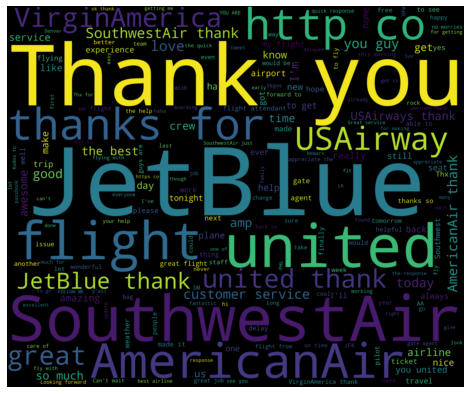

In [61]:
# Visualize the keywords

# Positive Sentiment keywords
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

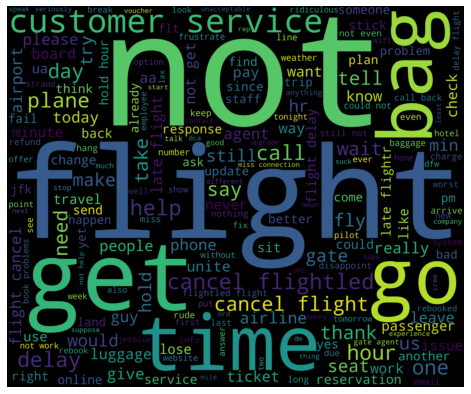

In [19]:
# Negative Sentiment keywords
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [20]:
# Check the text and sentiment randomly
i=300
df['airline_sentiment'][i], df['text'][i]

('neutral', 'check website go airport')

# Step 4: Vectorization

## Count Vectorization
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary. <br/>
Convert a collection of text documents to a matrix of token counts

In [21]:
count_vectorizer = CountVectorizer(analyzer='word', max_features=1000, stop_words = stopwords)

In [22]:
count_vectors = count_vectorizer.fit_transform(df['text'])
count_dense = count_vectors.todense()
count_features = count_dense.tolist()
len(count_features)

14640

In [23]:
# Check the words in the vocabulary
count_vocab = count_vectorizer.get_feature_names()

# Sum up the counts of each vocabulary word
dist = np.sum(count_features, axis=0)
feature_and_count = [[v,d] for v,d in sorted(zip(count_vocab, dist),key=lambda x: x[1], reverse=True)] # Sort by count and display
print(feature_and_count)

[['flight', 4870], ['not', 3888], ['get', 2122], ['thank', 1691], ['cancel', 1065], ['delay', 1005], ['service', 1001], ['time', 974], ['help', 957], ['go', 801], ['call', 791], ['fly', 784], ['bag', 771], ['customer', 753], ['wait', 753], ['us', 746], ['would', 741], ['hold', 717], ['make', 694], ['need', 687], ['hours', 677], ['plane', 638], ['try', 585], ['still', 583], ['please', 576], ['one', 567], ['gate', 541], ['back', 533], ['seat', 514], ['take', 513], ['book', 511], ['flightled', 508], ['say', 505], ['tell', 492], ['hour', 484], ['check', 472], ['change', 467], ['phone', 458], ['know', 442], ['like', 433], ['guy', 425], ['today', 425], ['late', 421], ['work', 410], ['miss', 406], ['airline', 401], ['ticket', 400], ['leave', 378], ['give', 371], ['could', 359], ['way', 357], ['board', 353], ['want', 349], ['airport', 344], ['day', 338], ['great', 336], ['sit', 336], ['travel', 330], ['lose', 329], ['unite', 329], ['even', 321], ['never', 321], ['send', 320], ['see', 315], ['w

## Tfidf Vectorization
(Term frequency times inverse document frequency)
Convert a collection of raw documents to a matrix of TF-IDF features. <br/>
Formula: tf-idf(t, d) = tf(t, d) * idf(t) where idf(t) = log [ n / df(t) ]

In [24]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', max_features=1500, stop_words = stopwords)

In [25]:
tfidf_vectors = tfidf_vectorizer.fit_transform(df['text'])
tfidf_dense = tfidf_vectors.todense()
tfidf_features = tfidf_dense.tolist()
len(tfidf_features)

14640

In [26]:
# Check the words in the vocabulary
tfidf_vocab = tfidf_vectorizer.get_feature_names()

# Sum up the counts of each vocabulary word
dist = np.sum(tfidf_features, axis=0)
feature_and_count = [[v,d] for v,d in sorted(zip(tfidf_vocab, dist),key=lambda x: x[1], reverse=True)] # Sort by count and display
print(feature_and_count)

[['flight', 747.1681237805356], ['not', 610.9658381474167], ['thank', 557.1168533417289], ['get', 420.0710025738406], ['delay', 248.42868325433616], ['cancel', 246.05677186222843], ['service', 245.36943476548706], ['help', 243.51897434698336], ['time', 230.98190683819104], ['go', 208.66570837447014], ['call', 202.61711689462027], ['fly', 202.5702504329578], ['customer', 198.32266128432548], ['hold', 196.5183269486839], ['wait', 195.4564042082125], ['bag', 194.43260090270465], ['would', 186.89695588191972], ['us', 183.637202417906], ['make', 182.42247060271814], ['need', 182.30999392211123], ['hours', 180.57687283496483], ['please', 173.154903745913], ['plane', 166.78869943747873], ['still', 162.15063365583114], ['try', 158.34920630991098], ['one', 155.8081132568134], ['gate', 147.38178156134106], ['back', 144.55287777164617], ['take', 144.3002669260077], ['flightled', 143.49397674569596], ['hour', 141.86722341461376], ['say', 140.45613476132985], ['guy', 137.60922720209322], ['tell', 1

# Model Building

## Model building with count vectorization data

### Data split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(count_features, df['airline_sentiment'], test_size=0.2)
len(X_train), y_train.shape, len(X_test), y_test.shape, 

(11712, (11712,), 2928, (2928,))

### RandomForestClassifier

In [29]:
rforest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10)
rforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
rforest_accuracy = np.mean(cross_val_score(rforest, X_test, y_test, cv=10))
print ("RandomForest accuracy: {:.2f} %".format(rforest_accuracy*100))

RandomForest accuracy: 63.97 %


### Naive Bayes

In [31]:
naive = naive_bayes.MultinomialNB()
naive.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
predictions_naive = naive.predict(X_test)
print("Naive accuracy: {:.2f} %".format(accuracy_score(predictions_naive, y_test)*100))

Naive accuracy: 75.68 %


### SVM

In [33]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
predictions_SVM = SVM.predict(X_test)
print("SVM accuracy: {:.2f} %".format(accuracy_score(predictions_SVM, y_test)*100))

SVM accuracy: 79.30 %


## Model building with Tfidf vectorization data

### Split data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['airline_sentiment'], test_size=0.2)
len(X_train), y_train.shape, len(X_test), y_test.shape, 

(11712, (11712,), 2928, (2928,))

In [35]:
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['airline_sentiment'], test_size=0.2)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

### RandomForest Classifier

In [36]:
rforest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10)
rforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
rforest_accuracy = np.mean(cross_val_score(rforest, X_test, y_test, cv=10))
print ("RandomForest accuracy: {:.2f} %".format(rforest_accuracy*100))

RandomForest accuracy: 62.81 %


### Naive Bayes

In [38]:
naive = naive_bayes.MultinomialNB()
naive.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [39]:
predictions_naive = naive.predict(X_test)
print("Naive accuracy: {:.2f} %".format(accuracy_score(predictions_naive, y_test)*100))

Naive accuracy: 72.92 %


### SVM

In [43]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
predictions_SVM = SVM.predict(X_test)
print("SVM accuracy: {:.2f} %".format(accuracy_score(predictions_SVM, y_test)*100))

SVM accuracy: 79.23 %


# Confusion Matrix

Naive Confusion Matrix


<Figure size 432x288 with 0 Axes>

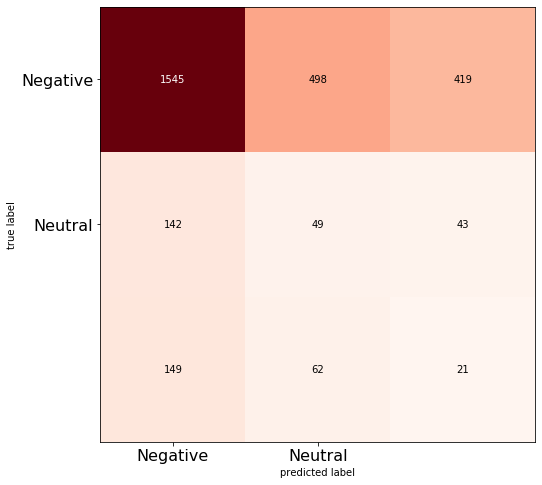

In [57]:
print("Naive Confusion Matrix")
cm=confusion_matrix(predictions_naive , y_test)
plt.figure()
plot_confusion_matrix(cm,figsize=(10,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

SVM Confusion Matrix


<Figure size 432x288 with 0 Axes>

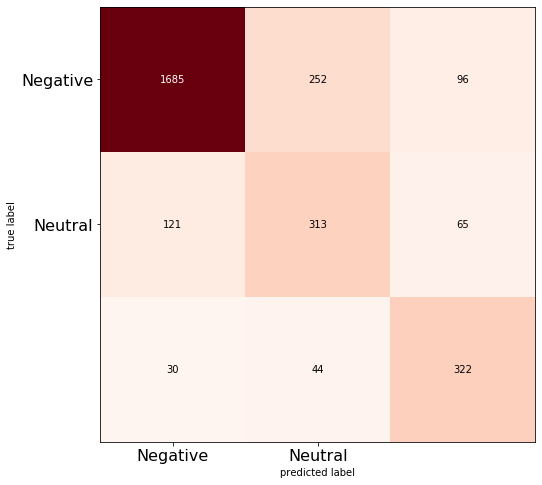

In [56]:
print("SVM Confusion Matrix")
cm=confusion_matrix(predictions_SVM , y_test)
plt.figure()
plot_confusion_matrix(cm,figsize=(10,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

# Summary

<ul>
    <li>The SVM model is giving good accuracy with Tfidf vectorization. I tried with different max features, but 1000 max feature is giving good result.</li>
    <li>The initial model gave me around 77% accuracy, but I added two more methods in the preprocess (ie. remove_http_URL and remove_tagging), it improved the performance around 80% </li>
    <li> This model performance can be improved by fine tuning the SVM model hyper parameters </li>
    <li> Printed the <b>Confusion Matrix</b> with predicted sentiment and actual sentiments (negative, netural and positive) </li>
    <li> From Confusion matrix, the <b>SVM model is performing better </b> than Naive Bayes </li>
</ul>

## Model with additiona features

In [80]:
df = pd.read_csv('Tweets.csv')
df = df[['airline_sentiment', 'text', 'user_timezone']]
df.head()

,airline_sentiment,text,user_timezone
0,neutral,@VirginAmerica What @dhepburn said.,Eastern Time (US & Canada)
1,positive,@VirginAmerica plus you've added commercials t...,Pacific Time (US & Canada)
2,neutral,@VirginAmerica I didn't today... Must mean I n...,Central Time (US & Canada)
3,negative,@VirginAmerica it's really aggressive to blast...,Pacific Time (US & Canada)
4,negative,@VirginAmerica and it's a really big bad thing...,Pacific Time (US & Canada)


In [81]:
print(df.isnull().sum())
df.dropna(inplace=True)
print(df.isnull().sum())

airline_sentiment       0
text                    0
user_timezone        4820
dtype: int64
airline_sentiment    0
text                 0
user_timezone        0
dtype: int64


In [82]:
# Pre-process the data
df['text'] = df['text'].map(clean_up)
print('preprocessed')

preprocessed


In [83]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', max_features=1500, stop_words = stopwords)
tfidf_vectors = tfidf_vectorizer.fit_transform(df['text'])
tfidf_dense = tfidf_vectors.todense()
tfidf_features = tfidf_dense.tolist()
len(tfidf_features)


9820

In [85]:
# Convert user_time to one hot encoding
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder

labelencoder = LabelEncoder()
df['user_timezone'] = labelencoder.fit_transform(df['user_timezone'])

In [94]:
# One hot encoding
time_zone_arr = pd.get_dummies(df['user_timezone'], drop_first=True)

In [100]:
# Concat features and user zone
X = np.concatenate((tfidf_features,time_zone_arr), axis=1)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, df['airline_sentiment'], test_size=0.2)

In [103]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [104]:
predictions_SVM = SVM.predict(X_test)
print("SVM accuracy: {:.2f} %".format(accuracy_score(predictions_SVM, y_test)*100))

SVM accuracy: 76.88 %
